<a href="https://colab.research.google.com/github/anamarijaeres/Analysis-of-the-Relationship-between-Movie-Titles-and-Corresponding-Ratings-and-Reviews/blob/main/4.1.1.%20Correlation%20between%20Titles%20as%20Word%20Embeddings%20and%20Ratings%20%26%204.1.2.%20Correlation%20between%20Titles%20as%20Emotion%20Vectors%20and%20Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import random
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from google.colab import drive
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/My Drive/dataset.xlsx')
df.columns
df=df.drop(['"imdbID"'], axis=1) 
df=df.drop(['"mov_galaxy_ID"'], axis=1) 
df.head()

,"""title""","""rating"""
0,"""10 Things I Hate About You""","""7.2"""
1,"""12 and Holding""","""7.6"""
2,"""127 Hours""","""7.6"""
3,"""1492: Conquest of Paradise""","""6.5"""
4,"""15 Minutes""","""6.1"""


In [ ]:
list_names= df['"title"'].tolist()
list_clear_names=[]
for i in list_names:
  name=''
  for j in i:
    if j!= "\"":
      name+=j
  list_clear_names.append(name)
print(list_clear_names[:3])

print("\nNumber of movies: ", len(list_clear_names))

['10 Things I Hate About You', '12 and Holding', '127 Hours']

Number of movies:  755


In [ ]:
list_ratings= df['"rating"'].tolist()
list_int_ratings=[]
for i in list_ratings:
  num=''
  for j in i:
    if j!= "\"":
      num+=j
  if num=="?":
    num='5'
  rating=int(round(float(num)))
  list_int_ratings.append([rating])

print(list_int_ratings[:3])
list_int_ratings_numpy= np.array(list_int_ratings)

[[7], [8], [8]]


In [ ]:
x_test = []
x_train = []
y_test = []
y_train = []

for i in range(len(list_clear_names)):
  movie = list_clear_names[i]
  rating = list_int_ratings_numpy[i]
  random_number = random.uniform(0,1)
  if random_number <= 0.33:
    x_test.append(movie)
    y_test.append(rating)
  else:
    x_train.append(movie)
    y_train.append(rating)

x_test_numpy=np.array(x_test)
partial_x_train_numpy = np.array(x_train)
y_test_numpy=np.array(y_test)
partial_y_train_numpy = np.array(y_train)


print(len(x_test_numpy))
print(len(partial_x_train_numpy))
print(len(y_test_numpy))
print(len(partial_y_train_numpy))
print(x_test_numpy[:3])
print(y_test_numpy[:3])

261
494
261
494
['12 and Holding' '15 Minutes' '17 Again']
[[8]
 [6]
 [6]]


In [ ]:
vocab_size = 1000
encoded_docs = [one_hot(d, vocab_size) for d in partial_x_train_numpy]
encoded_docs_test = [one_hot(d, vocab_size) for d in x_test_numpy]
print(encoded_docs_test[:3])

max_length = 12
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_length, padding='post')
print(padded_docs_test[:3])

[[534, 984, 929], [247, 858], [426, 769]]
[[534 984 929   0   0   0   0   0   0   0   0   0]
 [247 858   0   0   0   0   0   0   0   0   0   0]
 [426 769   0   0   0   0   0   0   0   0   0   0]]


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_length))
model.add(Flatten())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 50)            50000     
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 8)                 4808      
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 1

In [ ]:
model.fit(padded_docs, partial_y_train_numpy, epochs=400, verbose=0)
loss, accuracy = model.evaluate(padded_docs_test, y_test_numpy, verbose=0)
print('Accuracy: %f' % (accuracy*100))
print('Loss: %f' % (loss))

Accuracy: 38.314176
Loss: 10.864950


[1197, 1897, 1037, 552, 288, 159, 41, 10, 50, 26, 7, 6]
[169, 272, 148, 81, 42, 23, 6, 2, 7, 3, 1, 1]


Text(0.5, 1.0, 'Number of words in a movie title')

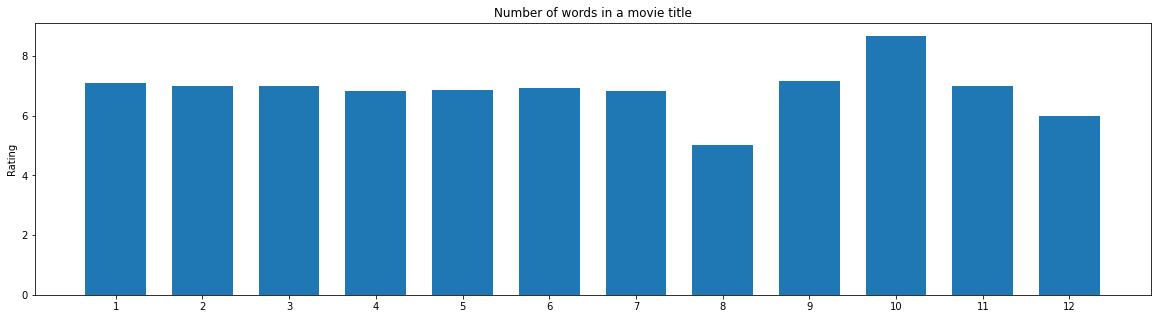

In [ ]:
list_addedRatings = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
list_countOfMovies = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(list_clear_names)):
  movie = list_clear_names[i]
  movie_word_list = movie.split()
  rating = list_int_ratings_numpy[i]
  list_addedRatings[len(movie_word_list)-1] += rating[0]
  list_countOfMovies[len(movie_word_list)-1] += 1

print(list_addedRatings)
print(list_countOfMovies)

for i in range(len(list_addedRatings)):
  list_addedRatings[i] /= list_countOfMovies[i]


plt.figure(figsize=(20, 5)) 
y_pos = np.arange(len(list_addedRatings))
plt.bar(y_pos, list_addedRatings, 0.7, align='center', alpha=1)
#plt.xticks(rotation=45)
plt.xticks(y_pos, [1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel('Rating')
plt.title('Number of words in a movie title')

### **USPOREDBA EMOTIVNE VRIJEDNOSTI TEKSTA (NASLOVA FILMOVA) I OCJENA**

In [ ]:
pip install text2emotion

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 174 kB 14.0 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=4207a1074d24e28058b1005dbaec49ce05fd750262bb585a3b97575a1c834b53
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [ ]:
import text2emotion as te
movie = list_clear_names[2]
print(movie)
emotional_dict = te.get_emotion(movie)
print(emotional_dict)
vector = []
vector.append(emotional_dict.get('Happy'))
vector.append(emotional_dict.get('Angry'))
vector.append(emotional_dict.get('Surprise'))
vector.append(emotional_dict.get('Sad'))
vector.append(emotional_dict.get('Fear'))
print(vector)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
127 Hours
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
[0, 0, 0, 0, 0]


In [ ]:
list_emotional_vectors = []
for movie in list_clear_names:
  emotional_dict = te.get_emotion(movie)
  vector = []
  vector.append(emotional_dict.get('Happy'))
  vector.append(emotional_dict.get('Angry'))
  vector.append(emotional_dict.get('Surprise'))
  vector.append(emotional_dict.get('Sad'))
  vector.append(emotional_dict.get('Fear'))
  list_emotional_vectors.append(vector)

print(list_clear_names[:3])
print(list_emotional_vectors[:3])

['10 Things I Hate About You', '12 and Holding', '127 Hours']
[[0.0, 0.0, 0.5, 0.5, 0.0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


In [ ]:
x_test = []
x_train = []
y_test = []
y_train = []

for i in range(len(list_emotional_vectors)):
  movie = list_emotional_vectors[i]
  rating = list_int_ratings_numpy[i]
  random_number = random.uniform(0,1)
  if random_number <= 0.15:
    x_test.append(movie)
    y_test.append(rating)
  else:
    x_train.append(movie)
    y_train.append(rating)

x_test_numpy=np.array(x_test)
partial_x_train_numpy = np.array(x_train)
y_test_numpy=np.array(y_test)
partial_y_train_numpy = np.array(y_train)


print(len(x_test_numpy))
print(len(partial_x_train_numpy))
print(len(y_test_numpy))
print(len(partial_y_train_numpy))
print(x_test_numpy[:3])
print(y_test_numpy[:3])


114
641
114
641
[[0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]]
[[7]
 [6]
 [6]]


In [ ]:
model2 = Sequential()
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(32, activation='relu'))
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(8, activation='relu'))
model2.add(Dense(10, activation='sigmoid'))

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


In [ ]:
model2.fit(partial_x_train_numpy, partial_y_train_numpy, epochs=400, verbose=0)
loss, accuracy = model2.evaluate(x_test_numpy, y_test_numpy, verbose=0)
print('Accuracy: %f' % (accuracy*100))
print('Loss: %f' % (loss))

model2.summary()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Accuracy: 31.578946
Loss: 1.657703
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 48        
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)  